In [1]:
import numpy as np
import pandas as pd
from skopt import gp_minimize, gbrt_minimize 
from skopt.plots import plot_convergence, plot_objective
from rl4greencrab.envs.green_crab_monthly_env import greenCrabMonthEnv
from rl4greencrab.envs.green_crab_monthly_env_norm import greenCrabMonthEnvNormalized
from rl4greencrab import evaluate_agent, multiConstAction, simulator
import matplotlib.pyplot as plt 
from ipywidgets import interact, widgets
from huggingface_hub import hf_hub_download
from stable_baselines3 import PPO, TD3
from stable_baselines3.common.env_util import make_vec_env
from sb3_contrib import TQC, RecurrentPPO

In [2]:
config = {
    "w_mort_scale" : 600,
    "growth_k": 0.70,
    'random_start':True
}

In [3]:
env = greenCrabMonthEnvNormalized(config)
vec_env = make_vec_env(greenCrabMonthEnvNormalized, n_envs=12)

/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


In [12]:
env.reset()
env.init_n_adult

846

In [7]:
model = PPO('MultiInputPolicy', env , verbose=0, tensorboard_log="/home/rstudio/logs")
model.learn(
	total_timesteps=500_000, 
	progress_bar=True,
)
model.save("ppo_month_observation")

Output()

In [16]:
ppoAgent = PPO.load("PPO_gcmenorm", device="cpu")

In [19]:
evalEnv = greenCrabMonthEnvNormalized(config)

In [20]:
N_EPS = 30

ppo_rew = evaluate_agent(agent=ppoAgent, env=evalEnv, ray_remote=True).evaluate(n_eval_episodes=N_EPS)

import ray
ray.shutdown()

2025-03-31 18:23:09,958	INFO worker.py:1841 -- Started a local Ray instance.


In [21]:
ppo_rew

-0.641548626758638

,t,obs0,obs1,act0,act1,act2,rew,rep
0,0,-1.0,-1.0,-1.0,-1.000000,-1.0,0.000000,0
1,1,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.000061,0
2,2,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.000123,0
3,3,-1.0,-1.0,-1.0,-0.976471,-1.0,-0.000184,0
4,4,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.001186,0
5,5,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.001248,0
6,6,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.001309,0
7,7,-1.0,-1.0,-1.0,-0.715384,-1.0,-0.001370,0
8,8,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.012816,0
9,9,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.012877,0


<Axes: xlabel='t'>

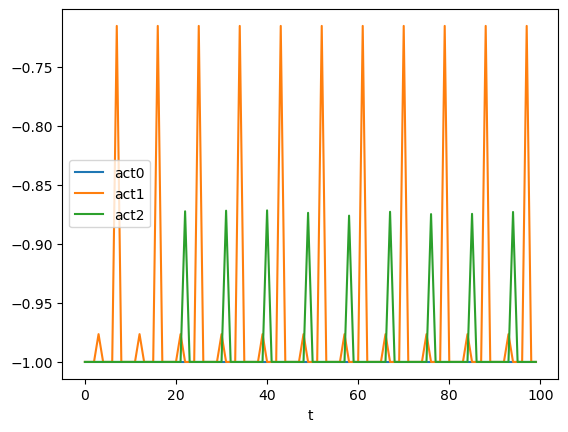

In [22]:
ppoData = simulator(env = evalEnv, agent = ppoAgent).simulate_full_named_dict_obs_acts()
ppoDataDF = pd.DataFrame(ppoData)
display(ppoDataDF.head(10))
ppoDataDF[ppoDataDF.rep == 0].plot(x='t', y =['act0', 'act1', 'act2'])

<Axes: xlabel='t'>

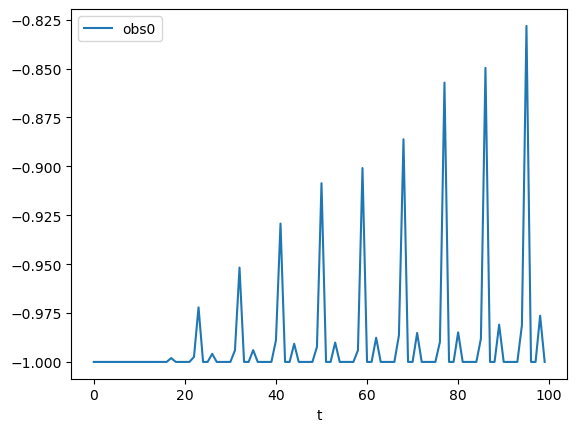

In [23]:
ppoDataDF[ppoDataDF.rep == 0].plot(x='t', y =['obs0'])

In [24]:
td3Agent = TD3.load("TD3_gcmenorm", device="cpu")

In [25]:
evalEnv = greenCrabMonthEnvNormalized(config)

/opt/conda/lib/python3.12/site-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


In [28]:
N_EPS = 30

td3_rew = evaluate_agent(agent=td3Agent, env=evalEnv, ray_remote=True).evaluate(n_eval_episodes=N_EPS)

import ray
ray.shutdown()

2025-03-31 18:24:09,945	INFO worker.py:1841 -- Started a local Ray instance.


In [31]:
td3_rew

-1.3325729752744606

,t,obs0,obs1,act0,act1,act2,rew,rep
0,0,-1.0,-1.0,-1.0,-1.000000,-1.0,0.000000,0
1,1,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.000061,0
2,2,-1.0,-1.0,-1.0,-0.165088,-1.0,-0.000123,0
3,3,-1.0,-1.0,-1.0,-1.000000,-1.0,-0.033580,0
4,4,-1.0,-1.0,-1.0,-0.986459,-1.0,-0.033642,0


<Axes: xlabel='t'>

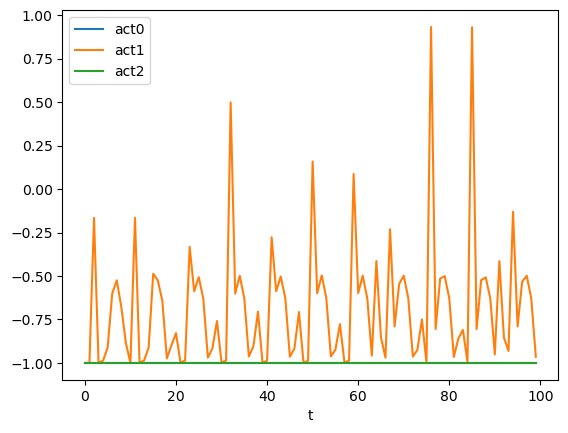

In [30]:
td3Data = simulator(env = evalEnv, agent = td3Agent).simulate_full_named_dict_obs_acts()
td3DataDF = pd.DataFrame(td3Data)
display(td3DataDF.head())
td3DataDF[td3DataDF.rep == 0].plot(x='t', y =['act0', 'act1', 'act2'])

In [ ]:
ppoDataDF[ppoDataDF.rep == 0].plot(x='t', y =['obs0'])